<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering: segmentation and grouping based on similarity between some groups in the dataset. To understand how rows in your data are similar to each other. Unsupervised. 

Cluster: group of objects that are similar, and dissimilar to others in other clusters.
* Recommendation.
* Fraud detection in credit card use.
* auto-categorizing news.
* characterizing patient behavior.
* Finding duplicates.

> **Partition-based Clustering**: mediem or large size.
* K-Means,K-Median,Fuzzy c-Means.

> **Hierarchical Clustering**: Produces trees of clusters. small size.
* Agglomerative, Divisive.

> **Density-based Clustering**: Produces arbitrary shaped clusters. for detecting noise.
* DBSCAN.


K-Means: using disimilarity matrix, minimize the intra-cluster distances and maximize the inter-cluster distances. **Euclidien distance**.
1. initialize k.(nbr of clusters).
2. distace calculation. distance matrix.
3. assign each point to closest centroid.
4. moving centroids.
5. repeat until there are no changes.

> Minimizing the error: **SSE** Sum of Squared differences between each point and its centroid.

> **Moving Centroids**

To solve the problem of the not optimal generalization and the dependent result to the initial centroids, we repeat the whole process with different initail points for centroids, it ll give us better results. It is very fast, so no problem with run it many times.

> Use different values of k and look at the matric of accuracy. to find the best value of k. get the **elbow point**.


# K-Means Clustering
## Random dataset

In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [48]:
# creating the dataset.
np.random.seed(0)
X,Y = make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)
# X: array of shape (5000,n_features) generated samples
# Y: array of shape(5000) integer labels for cluster memebership of each sample.

In [49]:
X[:5]

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       [-1.44019058, -1.36678252],
       [ 4.90119792,  4.53749125]])

In [50]:
X.shape

(5000, 2)

In [51]:
Y.shape

(5000,)

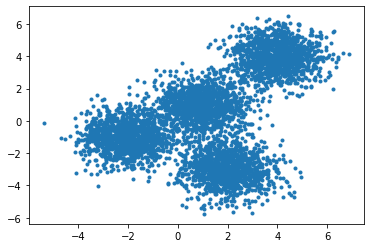

In [52]:
plt.scatter(X[:,0],X[:,1],marker='.')
plt.show()

In [53]:
# building the model
my_k_means = KMeans(init='k-means++',n_clusters=4,n_init=12)
my_k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
# grap the labels
my_k_means_labels = my_k_means.labels_
my_k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [55]:
my_k_means_labels.shape

(5000,)

In [56]:
# centroids
my_k_means_cluster_centers = my_k_means.cluster_centers_
my_k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

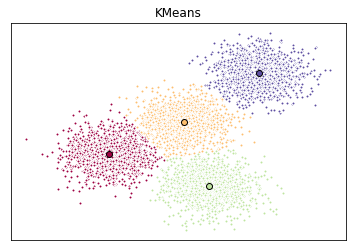

In [57]:
# visualization
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(my_k_means_labels))))
# create a plot
ax = fig.add_subplot(1,1,1)
# ploting
for k,col in zip(range(len(my_k_means_cluster_centers)),colors):
  cluster_memebers = (my_k_means_labels == k)
  cluster_center = my_k_means_cluster_centers[k]
  ax.plot(X[cluster_memebers,0],X[cluster_memebers,1],'w',markerfacecolor=col,marker=".")
  ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor="k",markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [58]:
# building another model to get only 3 clusters
my_k_means_ = KMeans(init='k-means++',n_clusters=3,n_init=12)
my_k_means_.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
# getting labels
my_k_means_labels_ = my_k_means_.labels_
# getting clusters centers
my_k_means_cluster_centers_ = my_k_means_.cluster_centers_
my_k_means_cluster_centers_.shape

(3, 2)

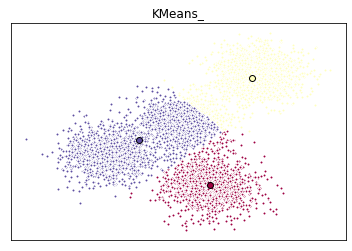

In [60]:
# visualization
fig_ = plt.figure(figsize=(6,4))
# getting colors
colors_ = plt.cm.Spectral(np.linspace(0,1,len(set(my_k_means_labels_))))
# create my plot
ax_ = fig_.add_subplot(1,1,1)
# ploting our data points
for k,col in zip(range(len(my_k_means_cluster_centers_)),colors_):
  cluster_memebers = (my_k_means_labels_ == k)
  cluster_center = my_k_means_cluster_centers_[k]
  ax_.plot(X[cluster_memebers,0],X[cluster_memebers,1],'w',markerfacecolor=col,marker=".")
  ax_.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor="k",markersize=6)
ax_.set_title('KMeans_')
ax_.set_xticks(())
ax_.set_yticks(())
plt.show()

# K-Means Clustering
## Customer Segmentation.

In [61]:
# downloading data.
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv

--2021-07-11 15:47:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.01s   

2021-07-11 15:47:39 (2.58 MB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [62]:
import pandas as pd
df = pd.read_csv('/content/Cust_Segmentation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [63]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [64]:
df.drop('Address',axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [66]:
# normalizing
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
x_data = StandardScaler().fit_transform(X)
x_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [67]:
x_data.shape

(850, 8)

In [68]:
# building the model
cluster_nbr = 3
k_means_cstmr = KMeans(init="k-means++",n_init=12,n_clusters=cluster_nbr)
k_means_cstmr.fit(x_data)
cstmr_labels = k_means_cstmr.labels_
cstmr_centers = k_means_cstmr.cluster_centers_
print(cstmr_labels.shape)


(850,)


In [69]:
# labels
c_ = np.bincount(cstmr_labels)

In [70]:
c__ = np.nonzero(c_)[0]
print(list(zip(c__,c_[c__])))

[(0, 166), (1, 537), (2, 147)]


In [71]:
# assign labels to each row in df
df['Cluster_KM'] = cstmr_labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_KM
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [72]:
df.groupby('Cluster_KM').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_KM,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


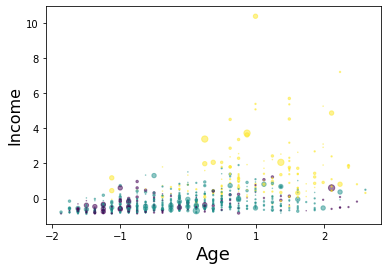

In [73]:
# visulizing distribution by age and income
area = np.pi * (x_data[:,1])**2
plt.scatter(x_data[:,0],x_data[:,3],s=area,c=cstmr_labels.astype(np.float),alpha=0.5)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income',fontsize=16)
plt.show()

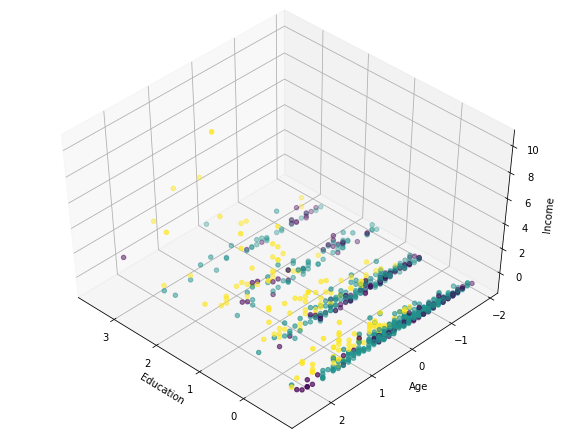

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig3D = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig3D,rect=[0,0,.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(x_data[:,1],x_data[:,0],x_data[:,3],c=cstmr_labels.astype(np.float))

then our clusters can be for exp:
* Affluent,Educated,Old Aged.
* Middle aged,middle income.
* Young and low income.